In [2]:
import sys; sys.path.append("..")
from typing import List, Tuple
from functools import reduce
from pathlib import Path

import pprint
import numpy as np
import matplotlib.pyplot as plt

from src.functional import get_factors

In [3]:
default_colormap = {
    1: 'gray',
    2: np.array([253, 172, 43]) / 255.0,
    3: np.array([130, 190, 90]) / 255.0,
    5: np.array([102, 185, 247]) / 255.0, 
    7: np.array([150, 113, 194]) / 255.0,
}
    

def draw_number_circle(number: int, colormap: dict = default_colormap, other_color='red', use_tqdm=False, ax=None):
    factors = get_factors(number, use_tqdm=use_tqdm)
    factors = sorted(factors.items(), key=lambda x: x[0])
#     print(factors)

    def _get_colors_and_labels():
        try:
            colors = reduce(list.__add__, [[colormap.get(fctr, other_color)] * cnt for fctr, cnt in factors if fctr != 1])
            labels = reduce(list.__add__, [[str(fctr)] * cnt for fctr, cnt in factors if fctr != 1])
        except TypeError:
            colors, labels = [colormap.get(1)], ['']
        if len(labels) == 1:
            labels[0] = ''
        return colors, labels

    colors, labels = _get_colors_and_labels()
    
    if ax is None:
        _, ax = plt.subplots(figsize=(6, 6))
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#     ax.axis([-5, 5, -5, 5])

    # draw pie chart as outer ring
    wedges, _ = ax.pie(
        [1] * len(colors), 
        colors=colors, 
        labeldistance=0.7, 
        labels=labels, 
        startangle=90, 
        textprops={'color': 'white', 'size': 18, 'fontweight': 'bold', 'fontfamily': 'Trebuchet MS'},
        wedgeprops={'edgecolor': 'white', 'linewidth': 5, 'antialiased': True},
    )
    
    # draw centural inner white circle
    c = plt.Circle((0, 0), 0.5, color='white')
    ax.add_artist(c)
    
    # draw number
    size = 48
    if number < 10:
        text_x_offset = -0.11
    elif 10 <= number < 100:
        text_x_offset = -0.21
    elif 100 <= number < 1000:
        text_x_offset = -0.32
    else:
        text_x_offset = -0.4
        size = 24
    t = plt.Text(text_x_offset, -0.14, str(number), size=size, fontfamily='Trebuchet MS', fontweight='bold')
    ax.add_artist(t)

    return ax

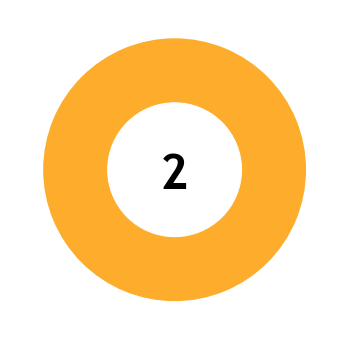

In [4]:
fig = draw_number_circle(2)

### Save individual number to filesystem

In [48]:
output_dir = Path('output')
output_dir.mkdir(parents=True, exist_ok=True)

In [ ]:
for i in range(1, 101):
    _ = draw_number_circle(i)
    plt.savefig(output_dir / f'{i:02}.svg', transparent=True)
    plt.close()

### Make a layout for printing

In [ ]:
# nrows, ncols = 20, 5
# max_numbers = 100
nrows, ncols = 3, 5
max_numbers = 15
fig, axes = plt.subplots(figsize=(ncols * 6, nrows * 8), nrows=nrows, ncols=ncols)
plt.tight_layout()
n = 0
while n < max_numbers:
    row, col = n // ncols, n % ncols
    draw_number_circle(n + 1, ax=axes[row][col])
    frame = plt.Rectangle((-1.3, -1.8), 2.6, 3.6, fill=False, linewidth=3)
    axes[row][col].add_artist(frame)
    axes[row][col].axis([-1.6, 1.6, -2.1, 2.1])
    n += 1

save_path = Path(f"1-{max_numbers}.svg")
save_path.parent.mkdir(parents=True, exist_ok=True)
plt.savefig(save_path, transparent=True)